In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn as skl
import datetime as dt

C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages

In [2]:
biden_1debate_df = pd.read_csv("Biden_FirstDebate_2020.csv")

C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
biden_1debate_df.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1311455787206627333,1311396967159799810,2020-09-30 19:59:59 Eastern Daylight Time,2020-09-30,19:59:59,-400,1288621002583240705,dailyphoenix1,Daily Phoenix,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '832376325306359808', 'username': ...",NaN,NaN,NaN,NaN
1,1311455785822695424,1311128884121755648,2020-09-30 19:59:59 Eastern Daylight Time,2020-09-30,19:59:59,-400,1278008053686730753,maya73863414,maya,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '956360508575232002', 'username': ...",NaN,NaN,NaN,NaN
2,1311455785688485889,1311422569522831363,2020-09-30 19:59:59 Eastern Daylight Time,2020-09-30,19:59:59,-400,57237687,wesatkinson,Big Wes,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '939091', 'username': 'JoeBiden'}",NaN,NaN,NaN,NaN
3,1311455785164079106,1311455785164079106,2020-09-30 19:59:59 Eastern Daylight Time,2020-09-30,19:59:59,-400,554408108,woodrow823,Woodrow,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
4,1311455784895680512,1311402310489247750,2020-09-30 19:59:59 Eastern Daylight Time,2020-09-30,19:59:59,-400,306055499,sadie_75resist,😷SADIE💙2020 BLUE WAVE💙,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '1249416438051246080', 'username':...",NaN,NaN,NaN,NaN


In [4]:
biden_1debate_df.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet            float64
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [5]:
biden_1debate_df.isnull().sum(axis = 0)

id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                   50
place              536201
tweet                   0
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet            536260
quote_url          504852
video                   0
thumbnail          475276
near               536260
geo                536260
source             536260
user_rt_id         536260
user_rt            536260
retweet_id         536260
reply_to                0
retweet_date       536260
translate          536260
trans_src          536260
trans_dest         536260
dtype: int64

In [6]:
biden_1debate_df.retweet.value_counts()

Series([], Name: retweet, dtype: int64)

In [7]:
biden_1debate_df.shape

(536260, 36)

In [8]:
columns = ["place", "retweet", "quote_url", "near", "geo", "source", "user_rt_id", "user_rt", "retweet_date", "retweet_id", "translate", "trans_src", "trans_dest"]

In [9]:
biden_1debate_df.drop(columns, axis=1, inplace=True)

In [10]:
biden_1debate_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to
0,1311455787206627333,1311396967159799810,2020-09-30 19:59:59 Eastern Daylight Time,2020-09-30,19:59:59,-400,1288621002583240705,dailyphoenix1,Daily Phoenix,@kathyhoffman_az @JoeBiden Should we have CRT ...,...,[],1,0,2,[],[],https://twitter.com/DailyPhoenix1/status/13114...,0,NaN,"{'user_id': '832376325306359808', 'username': ..."
1,1311455785822695424,1311128884121755648,2020-09-30 19:59:59 Eastern Daylight Time,2020-09-30,19:59:59,-400,1278008053686730753,maya73863414,maya,@Rocket54441 @JoeBiden Literally trump but ok,...,[],0,0,0,[],[],https://twitter.com/maya73863414/status/131145...,0,NaN,"{'user_id': '956360508575232002', 'username': ..."
2,1311455785688485889,1311422569522831363,2020-09-30 19:59:59 Eastern Daylight Time,2020-09-30,19:59:59,-400,57237687,wesatkinson,Big Wes,@JoeBiden @MonicaLewinsky https://t.co/Wni5F0WJHt,...,['https://pbs.twimg.com/media/EjM6FGwXgAEhUL3....,0,0,2,[],[],https://twitter.com/wesatkinson/status/1311455...,1,https://pbs.twimg.com/media/EjM6FGwXgAEhUL3.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}"
3,1311455785164079106,1311455785164079106,2020-09-30 19:59:59 Eastern Daylight Time,2020-09-30,19:59:59,-400,554408108,woodrow823,Woodrow,Pres. you missed the op to mention HBCU. @Joe...,...,[],0,0,0,['blackvote'],[],https://twitter.com/woodrow823/status/13114557...,0,NaN,"{'user_id': None, 'username': None}"
4,1311455784895680512,1311402310489247750,2020-09-30 19:59:59 Eastern Daylight Time,2020-09-30,19:59:59,-400,306055499,sadie_75resist,😷SADIE💙2020 BLUE WAVE💙,@Jillbiden46 @JoeBiden ❤️ #VoteBidenHarris2020...,...,['https://pbs.twimg.com/tweet_video_thumb/EjM6...,0,0,0,"['votebidenharris2020', 'voteearly', 'votebide...",[],https://twitter.com/Sadie_75Resist/status/1311...,1,https://pbs.twimg.com/tweet_video_thumb/EjM6FP...,"{'user_id': '1249416438051246080', 'username':..."


In [11]:
biden_1debate_df.timezone.value_counts()

-400    536260
Name: timezone, dtype: int64

In [12]:
biden_1debate_df.user_id.value_counts()

1216941395975507973    340
1298358446270472192    207
1255913478440665088    201
1305951790903554050    175
1267427037968556037    164
                      ... 
3059411045               1
720260133767524352       1
203081825                1
259729501                1
50333697                 1
Name: user_id, Length: 293422, dtype: int64

In [13]:
biden_1debate_df.username.nunique()

293422

In [14]:
tweet_time = biden_1debate_df.time.value_counts()
tweet_time

00:00:40    35
00:02:28    30
00:00:09    29
00:15:34    29
00:00:03    29
            ..
02:43:52     1
03:29:57     1
04:38:34     1
02:23:43     1
05:43:14     1
Name: time, Length: 71387, dtype: int64

In [15]:
biden_1debate_df["hour"]=pd.to_datetime(biden_1debate_df['time'], format='%H:%M:%S').dt.hour

In [16]:
hours=biden_1debate_df.hour.value_counts()

In [17]:
biden_1debate_df.hour.index

RangeIndex(start=0, stop=536260, step=1)

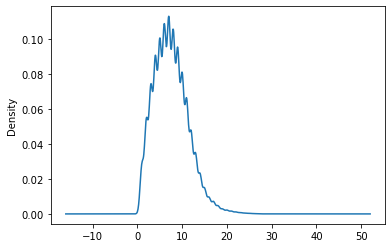

In [18]:
# Visualize the value counts
tweet_time.plot.density()

In [19]:
tweet_time.index

Index(['00:00:40', '00:02:28', '00:00:09', '00:15:34', '00:00:03', '00:00:25',
       '00:03:47', '00:00:59', '00:03:57', '00:00:00',
       ...
       '05:30:48', '02:27:11', '04:05:20', '03:13:30', '04:02:40', '02:43:52',
       '03:29:57', '04:38:34', '02:23:43', '05:43:14'],
      dtype='object', length=71387)

In [20]:
tweet_time.values

array([35, 30, 29, ...,  1,  1,  1], dtype=int64)

In [21]:
hours

0     49336
11    35283
10    34615
12    34242
9     33543
8     32621
13    31812
14    30712
1     29118
17    27983
18    27703
15    26429
16    26402
19    25259
7     22889
2     18565
6     14701
3     13197
5     11240
4     10610
Name: hour, dtype: int64

In [22]:
hours.sort_index(ascending=True, inplace=True)

In [23]:
hours

0     49336
1     29118
2     18565
3     13197
4     10610
5     11240
6     14701
7     22889
8     32621
9     33543
10    34615
11    35283
12    34242
13    31812
14    30712
15    26429
16    26402
17    27983
18    27703
19    25259
Name: hour, dtype: int64

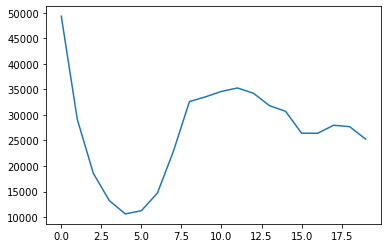

In [24]:
hours.plot()